In [ ]:
import pandas as pd

data = pd.read_csv('TelcoCustomerChurn.csv')

In [ ]:
data['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


In [ ]:
data.info(), data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


(None,
    customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
 0  7590-VHVEG  Female              0     Yes         No       1           No   
 1  5575-GNVDE    Male              0      No         No      34          Yes   
 2  3668-QPYBK    Male              0      No         No       2          Yes   
 3  7795-CFOCW    Male              0      No         No      45           No   
 4  9237-HQITU  Female              0      No         No       2          Yes   
 
       MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
 0  No phone service             DSL             No  ...               No   
 1                No             DSL            Yes  ...              Yes   
 2                No             DSL            Yes  ...               No   
 3  No phone service             DSL            Yes  ...              Yes   
 4                No     Fiber optic             No  ...               No   
 
   TechSupport StreamingTV StreamingMovie

In [ ]:
data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

data.drop(columns=['customerID'], inplace=True)

# Convert 'TotalCharges' to numeric
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Fill any missing values in 'TotalCharges' with 0
data['TotalCharges'].fillna(0, inplace=True)

<ipython-input-5-b0a2ac81ebc7>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['TotalCharges'].fillna(0, inplace=True)


In [ ]:
# Define mappings based on paper requirements for binary and categorical encoding
binary_mapping = {
    'gender': {'Female': 1, 'Male': 2},
    'Partner': {'Yes': 1, 'No': 0},
    'Dependents': {'No': 0, 'Yes': 1},
    'PhoneService': {'Yes': 1, 'No': 0},
    'PaperlessBilling': {'Yes': 1, 'No': 0},
    'Churn': {'Yes': 1, 'No': 0}
}

# Apply binary mappings
for col, mapping in binary_mapping.items():
    data[col] = data[col].map(mapping)

# Define custom mappings for multi-class categorical columns
multi_class_mapping = {
    'MultipleLines': {'No': 0, 'Yes': 1, 'No phone service': 3},
    'InternetService': {'DSL': 1, 'Fiber optic': 2, 'No': 0},
    'OnlineSecurity': {'No': 0, 'Yes': 1, 'No internet service': 2},
    'OnlineBackup': {'No': 0, 'Yes': 1, 'No internet service': 2},
    'DeviceProtection': {'No': 0, 'Yes': 1, 'No internet service': 2},
    'TechSupport': {'No': 0, 'Yes': 1, 'No internet service': 2},
    'StreamingTV': {'No': 0, 'Yes': 1, 'No internet service': 2},
    'StreamingMovies': {'No': 0, 'Yes': 1, 'No internet service': 2},
    'Contract': {'Month-to-month': 0, 'One year': 1, 'Two year': 2}
}
# Use one-hot encoding for the remaining categorical columns
data = pd.get_dummies(data, columns=['PaymentMethod'])

# Apply custom mappings for multi-class columns
for col, mapping in multi_class_mapping.items():
    data[col] = data[col].map(mapping)

# Verify the transformed data structure
data.info(), data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7043 non-null   int64  
 1   SeniorCitizen                            7043 non-null   int64  
 2   Partner                                  7043 non-null   int64  
 3   Dependents                               7043 non-null   int64  
 4   tenure                                   7043 non-null   int64  
 5   PhoneService                             7043 non-null   int64  
 6   MultipleLines                            7043 non-null   int64  
 7   InternetService                          7043 non-null   int64  
 8   OnlineSecurity                           7043 non-null   int64  
 9   OnlineBackup                             7043 non-null   int64  
 10  DeviceProtection                         7043 no

(None,
    gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
 0       1              0        1           0       1             0   
 1       2              0        0           0      34             1   
 2       2              0        0           0       2             1   
 3       2              0        0           0      45             0   
 4       1              0        0           0       2             1   
 
    MultipleLines  InternetService  OnlineSecurity  OnlineBackup  ...  \
 0              3                1               0             1  ...   
 1              0                1               1             0  ...   
 2              0                1               1             1  ...   
 3              3                1               1             0  ...   
 4              0                2               0             0  ...   
 
    StreamingMovies  Contract  PaperlessBilling  MonthlyCharges  TotalCharges  \
 0                0         0         

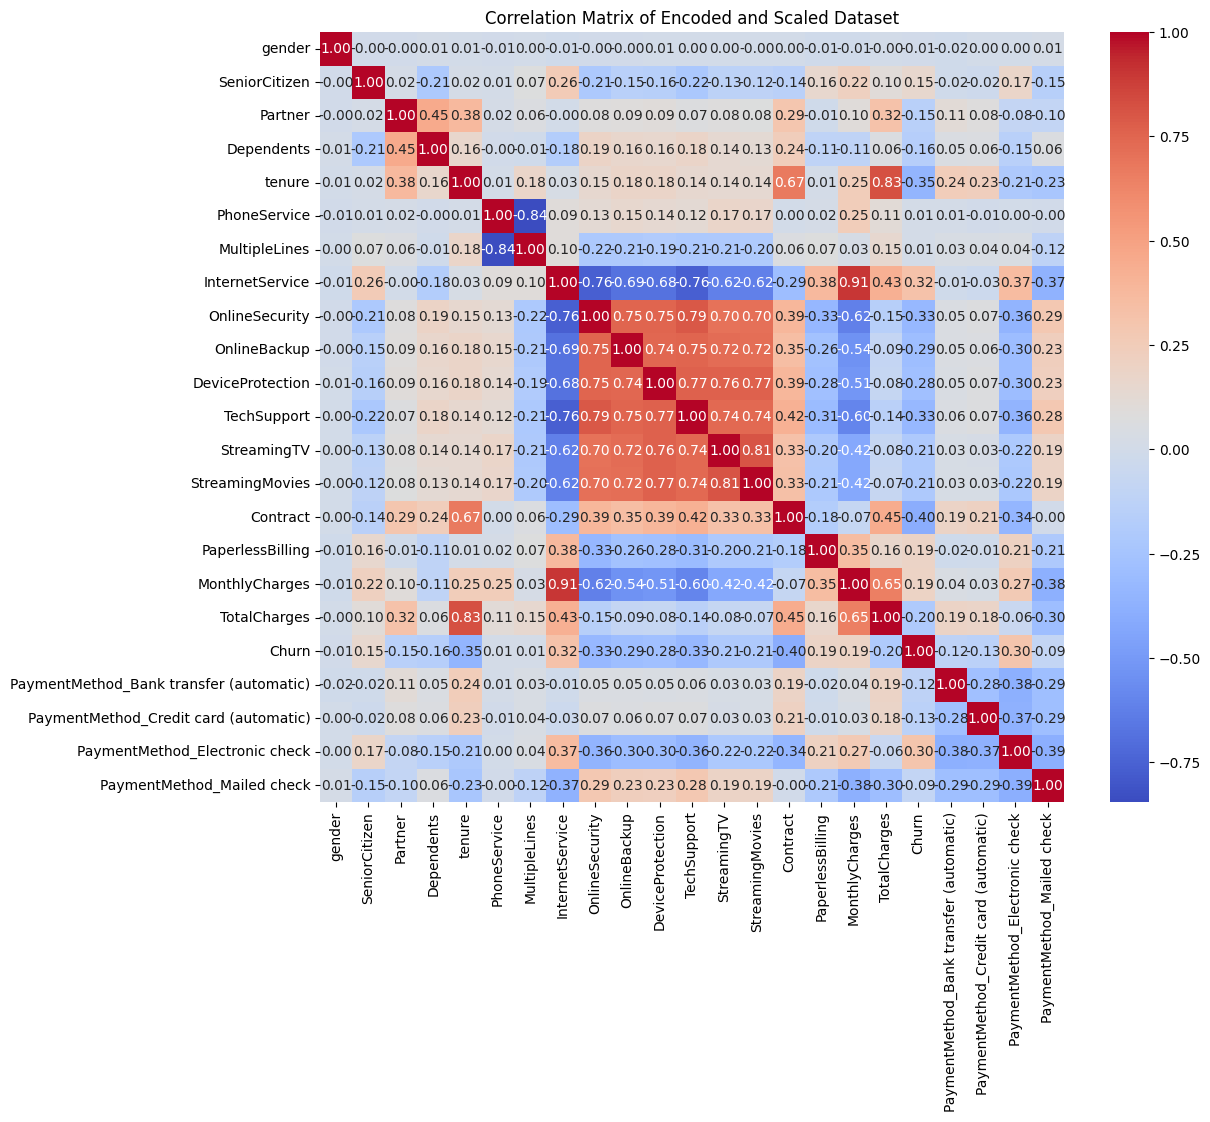

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Generate the correlation matrix
corr_matrix = data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix of Encoded and Scaled Dataset")
plt.show()


In [ ]:
# Separate features and target variable
X = data.drop(columns='Churn')
y = data['Churn']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the numerical columns
scaler = StandardScaler()
# X_train[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.fit_transform(X_train[['tenure', 'MonthlyCharges', 'TotalCharges']])
# X_test[['tenure', 'MonthlyCharges', 'TotalCharges']] = scaler.transform(X_test[['tenure', 'MonthlyCharges', 'TotalCharges']])

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score

# Dictionary to store results for each model
results = {}

# K-Nearest Neighbors (KNN) with GridSearchCV
knn_params = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}
knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn, knn_params, cv=5, scoring='roc_auc')
knn_grid.fit(X_train, y_train)
knn_best = knn_grid.best_estimator_

# Predictions and performance for KNN
knn_pred = knn_best.predict(X_test)
knn_pred_train = knn_best.predict(X_train)
knn_acc = accuracy_score(y_test, knn_pred)
knn_acc_pred = accuracy_score(y_train, knn_pred_train)
knn_auc = roc_auc_score(y_test, knn_best.predict_proba(X_test)[:, 1])

results['KNN'] = {'Best Params': knn_grid.best_params_,'Train_Accuracy':knn_acc_pred, 'Test_Accuracy': knn_acc, 'AUC': knn_auc}

# Logistic Regression (LR) with GridSearchCV
lr_params = {'C': [0.01, 0.1, 1, 10], 'solver': ['liblinear', 'lbfgs']}
lr = LogisticRegression(max_iter=1000)
lr_grid = GridSearchCV(lr, lr_params, cv=5, scoring='roc_auc')
lr_grid.fit(X_train, y_train)
lr_best = lr_grid.best_estimator_

# Predictions and performance for LR
lr_pred = lr_best.predict(X_test)
lr_pred_train = lr_best.predict(X_train)
lr_acc = accuracy_score(y_test, lr_pred)
lr_acc_pred = accuracy_score(y_train, lr_pred_train)
lr_auc = roc_auc_score(y_test, lr_best.predict_proba(X_test)[:, 1])

results['Logistic Regression'] = {'Best Params': lr_grid.best_params_, 'Train_Accuracy':lr_acc_pred,'Test_Accuracy': lr_acc, 'AUC': lr_auc}

results

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


{'KNN': {'Best Params': {'n_neighbors': 9, 'weights': 'uniform'},
  'Train_Accuracy': 0.8135902636916835,
  'Test_Accuracy': 0.7718883104590629,
  'AUC': 0.8060553370780157},
 'Logistic Regression': {'Best Params': {'C': 10, 'solver': 'liblinear'},
  'Train_Accuracy': 0.8052738336713996,
  'Test_Accuracy': 0.8121154756270705,
  'AUC': 0.8593004643496729}}

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Random Forest (RF) with RandomizedSearchCV
rf_params = {'n_estimators': [100, 200, 300], 'max_depth': [10, 20, 30], 'min_samples_split': [2, 5, 10]}
rf = RandomForestClassifier(random_state=42)
rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='roc_auc')
rf_grid.fit(X_train, y_train)
rf_best = rf_grid.best_estimator_

# Predictions and performance for RF
rf_pred = rf_best.predict(X_test)
rf_pred_train = rf_best.predict(X_train)
rf_acc = accuracy_score(y_test, rf_pred)
rf_acc_pred = accuracy_score(y_train, rf_pred_train)
rf_auc = roc_auc_score(y_test, rf_best.predict_proba(X_test)[:, 1])

results['Random Forest'] = {'Best Params': rf_grid.best_params_,'Train_Accuracy':rf_acc_pred, 'Test_Accuracy': rf_acc, 'AUC': rf_auc}

# Stochastic Gradient Booster (SGB) with RandomizedSearchCV
sgb_params = {'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': [3, 5, 7]}
sgb = GradientBoostingClassifier(random_state=42)
sgb_grid = GridSearchCV(sgb, sgb_params, cv=5, scoring='roc_auc')
sgb_grid.fit(X_train, y_train)
sgb_best = sgb_grid.best_estimator_

# Predictions and performance for SGB
sgb_pred = sgb_best.predict(X_test)
sgb_pred_train = sgb_best.predict(X_train)
sgb_acc = accuracy_score(y_test, sgb_pred)
sgb_acc_pred = accuracy_score(y_train, sgb_pred_train)
sgb_auc = roc_auc_score(y_test, sgb_best.predict_proba(X_test)[:, 1])


results['Stochastic Gradient Booster'] = {'Best Params': sgb_grid.best_params_, 'Train_Accuracy':sgb_acc_pred, 'Test_Accuracy': sgb_acc, 'AUC': sgb_auc}

results

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


{'KNN': {'Best Params': {'n_neighbors': 9, 'weights': 'uniform'},
  'Train_Accuracy': 0.8135902636916835,
  'Test_Accuracy': 0.7718883104590629,
  'AUC': 0.8060553370780157},
 'Logistic Regression': {'Best Params': {'C': 10, 'solver': 'liblinear'},
  'Train_Accuracy': 0.8052738336713996,
  'Test_Accuracy': 0.8121154756270705,
  'AUC': 0.8593004643496729},
 'Random Forest': {'Best Params': {'max_depth': 10,
   'min_samples_split': 10,
   'n_estimators': 300},
  'Train_Accuracy': 0.8586206896551725,
  'Test_Accuracy': 0.8017037387600567,
  'AUC': 0.8577275392636967},
 'Stochastic Gradient Booster': {'Best Params': {'learning_rate': 0.01,
   'max_depth': 3,
   'n_estimators': 300},
  'Train_Accuracy': 0.808316430020284,
  'Test_Accuracy': 0.7936583057264552,
  'AUC': 0.8582216607462649}}

In [ ]:
# Simplify the parameter grids for faster computation
rf_params = {'n_estimators': [100, 150], 'max_depth': [10, 15], 'min_samples_split': [5, 10]}
sgb_params = {'n_estimators': [100, 150], 'learning_rate': [0.1, 0.2], 'max_depth': [3, 5]}

# Random Forest (RF) with simplified GridSearchCV
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=3, scoring='roc_auc')
rf_grid.fit(X_train, y_train)
rf_best = rf_grid.best_estimator_

# Predictions and performance for RF
rf_pred = rf_best.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)
rf_auc = roc_auc_score(y_test, rf_best.predict_proba(X_test)[:, 1])

results['Random Forest'] = {'Best Params': rf_grid.best_params_, 'Accuracy': rf_acc, 'AUC': rf_auc}

# Stochastic Gradient Booster (SGB) with simplified GridSearchCV
sgb_grid = GridSearchCV(GradientBoostingClassifier(random_state=42), sgb_params, cv=3, scoring='roc_auc')
sgb_grid.fit(X_train, y_train)
sgb_best = sgb_grid.best_estimator_

# Predictions and performance for SGB
sgb_pred = sgb_best.predict(X_test)
sgb_acc = accuracy_score(y_test, sgb_pred)
sgb_auc = roc_auc_score(y_test, sgb_best.predict_proba(X_test)[:, 1])

results['Stochastic Gradient Booster'] = {'Best Params': sgb_grid.best_params_, 'Accuracy': sgb_acc, 'AUC': sgb_auc}

results

{'KNN': {'Best Params': {'n_neighbors': 9, 'weights': 'uniform'},
  'Train_Accuracy': 0.8135902636916835,
  'Test_Accuracy': 0.7718883104590629,
  'AUC': 0.8060553370780157},
 'Logistic Regression': {'Best Params': {'C': 10, 'solver': 'liblinear'},
  'Train_Accuracy': 0.8052738336713996,
  'Test_Accuracy': 0.8121154756270705,
  'AUC': 0.8593004643496729},
 'Random Forest': {'Best Params': {'max_depth': 10,
   'min_samples_split': 10,
   'n_estimators': 150},
  'Accuracy': 0.7993374349266446,
  'AUC': 0.8567987267174259},
 'Stochastic Gradient Booster': {'Best Params': {'learning_rate': 0.1,
   'max_depth': 3,
   'n_estimators': 100},
  'Accuracy': 0.8054898248935163,
  'AUC': 0.8586059774549292}}

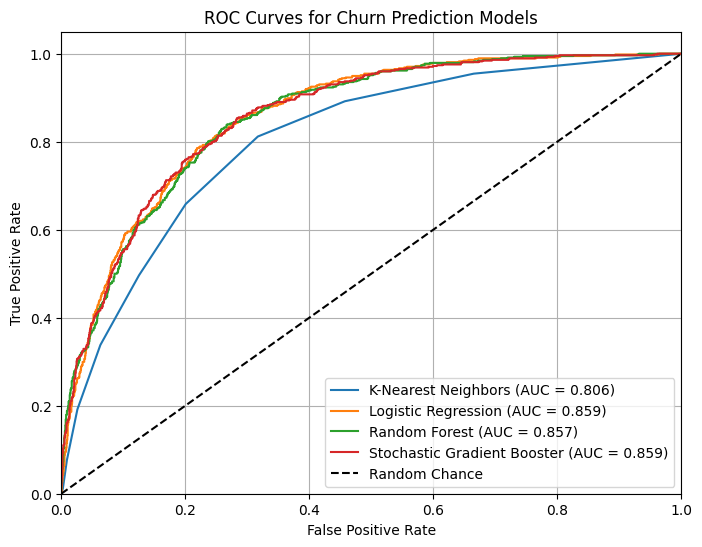

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Function to plot ROC curves for each model
def plot_roc_curve(model, X_test, y_test, label):
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.3f})')

# Plot ROC curves for all models
plt.figure(figsize=(8, 6))
plot_roc_curve(knn_best, X_test, y_test, 'K-Nearest Neighbors')
plot_roc_curve(lr_best, X_test, y_test, 'Logistic Regression')
plot_roc_curve(rf_best, X_test, y_test, 'Random Forest')
plot_roc_curve(sgb_best, X_test, y_test, 'Stochastic Gradient Booster')

# Add plot details
plt.plot([0, 1], [0, 1], 'k--', label="Random Chance")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Churn Prediction Models')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
